<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chargment-de-la-configuration" data-toc-modified-id="Chargment-de-la-configuration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chargment de la configuration</a></span></li><li><span><a href="#Téléchargement-des-données" data-toc-modified-id="Téléchargement-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Téléchargement des données</a></span></li><li><span><a href="#Classification-des-images" data-toc-modified-id="Classification-des-images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification des images</a></span><ul class="toc-item"><li><span><a href="#Entraînement" data-toc-modified-id="Entraînement-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Entraînement</a></span></li><li><span><a href="#Performances-de-la-classification" data-toc-modified-id="Performances-de-la-classification-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Performances de la classification</a></span></li><li><span><a href="#Classification-du-dataset" data-toc-modified-id="Classification-du-dataset-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Classification du dataset</a></span></li></ul></li><li><span><a href="#Segmentation-des-catalogues" data-toc-modified-id="Segmentation-des-catalogues-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Segmentation des catalogues</a></span><ul class="toc-item"><li><span><a href="#Préparation-des-annotations" data-toc-modified-id="Préparation-des-annotations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Préparation des annotations</a></span></li><li><span><a href="#dhSegment" data-toc-modified-id="dhSegment-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>dhSegment</a></span></li><li><span><a href="#Tensorflow-Object-Detection-API-(TODA)" data-toc-modified-id="Tensorflow-Object-Detection-API-(TODA)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Tensorflow Object Detection API (TODA)</a></span></li><li><span><a href="#Optimisation-des-hyper-paramètres" data-toc-modified-id="Optimisation-des-hyper-paramètres-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Optimisation des hyper-paramètres</a></span><ul class="toc-item"><li><span><a href="#Post-processing-dhSegment" data-toc-modified-id="Post-processing-dhSegment-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Post-processing dhSegment</a></span></li><li><span><a href="#Post-processing-Tensorflow-object-detection-API" data-toc-modified-id="Post-processing-Tensorflow-object-detection-API-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Post-processing Tensorflow object detection API</a></span></li></ul></li><li><span><a href="#Performance-de-la-segmentation" data-toc-modified-id="Performance-de-la-segmentation-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Performance de la segmentation</a></span></li><li><span><a href="#Segmentation-du-dataset" data-toc-modified-id="Segmentation-du-dataset-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Segmentation du dataset</a></span></li></ul></li><li><span><a href="#Base-de-donnée" data-toc-modified-id="Base-de-donnée-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Base de donnée</a></span><ul class="toc-item"><li><span><a href="#Extraction-du-contenu-des-pages" data-toc-modified-id="Extraction-du-contenu-des-pages-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Extraction du contenu des pages</a></span></li><li><span><a href="#Prépartion-des-données-pour-sql" data-toc-modified-id="Prépartion-des-données-pour-sql-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Prépartion des données pour sql</a></span></li><li><span><a href="#Importation-des-données-dans-une-base-mysql" data-toc-modified-id="Importation-des-données-dans-une-base-mysql-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Importation des données dans une base mysql</a></span></li></ul></li></ul></div>

## Chargment de la configuration

In [1]:
from config import load_default_config
config = load_default_config('./data')
config['base_folder'] = './test'
config['images_folder'] = '/path/to/drouot/images'

## Téléchargement des données

Code pour télécharger les données depuis l'interface OAI-PMH de la bibliothèque numérique, les catalogues de ventes sont disponibles dans le set ```oai:sets:16800```.

Le code va télécharger toutes les métadonnées du set, et y sauver dans un fichier brut ```inha_bib_num_metadata.json.gz```, le code va également télécharger toutes les métadonées iiif correspondante pour également tout le set, vu que les informations de date et lieu sont mieux formatées dans ces dernière et va sauver ces informations dans le fichier ```iiif_manifests.json.gz```. Ces deux fichiers sont les portes d'entrées pour la collection et permettent de télécharger les fichiers d'images ainsi que d'obtenir toutes les métadonnées des catalogues de ventes.

Cette collection globale et les identifiants qui leur sont propres sont ensuite "mappé" vers une numérotation interne pour plus d'uniformité, les liens pour passer de l'un à l'autre se font aux travers de deux fichiers eux aussi sauvegardé sous la forme de jsons:
- ```idx2inhaIdx.json``` qui convertit de l'identifiant interne vers l'identifiant numérique unique de la bibliothèque numérique
- ```idx2cote.json``` qui convertit de l'identifiant interne vers la côte de la bibliothèque

Ces données sont plus ou moins fixes, mais changent à chaque fois que de nouveaux documents sont publiés sur la biblothèque numérique.

Un choix a été fait de ne se concentrer que sur la période 1939-1945 et sur la maison de vente Drouot afin d'avoir des documents relativement uniformes dans leur mise en page et un nombre relativement petit (1911 catalogues de vente). Ce choix est directement codé dans le code et n'offre pas d'options de configuration pour le changer.

Les métadonées sont donc filtrées pour le sous-set mentionné juste avant et les images sont automatiquement téléchargées avec comme convention de nommage 6 chiffres d'identifiant unique et 6 chiffres de pages. Donc par exemple pour la page 15 du document 1754, le fichier est ```001754_000014.jpg``` (14 car la numérotation commence à 0). Le nombre d'image avec ce filtre est d'environ 40'000 pour 1911 catalogues.

In [ ]:
from data_downloader.downloading_data import downloading_data
downloading_data(config)

La numérisation des images n’étant pas consistante, certains des images de catalogues contiennent deux pages et d’autre qu’une seule. Afin d'éviter toute erreur de classification sur cette étape, les images ont été triées à la mains (après une pré-classification réalisée avec des heuristiques simples), le temps pour trier les 40’000 pages étant relativement court (2 heures).

Les image qui contenaient deux pages ont ensuite simplement été coupées en deux, car la numérisation était bien alignée.

Il faut donc créer un fichier qui contient le chemin absolu vers les fichiers qui contiennent des pages doubles. Le code va ensuite couper ces images en deux et supprimer (!!!) l'original.

Si une image est coupée en deux, elle devient donc deux images avec le suffixe ```l``` si c'est l'image de gauche et ```r``` si c'est l'image de droite.

In [4]:
from data_downloader.cutting_pages import cutting_pages

config['data']['two_pages_path'] = 'path/to/two_pages_files.txt'

cutting_pages(config)

## Classification des images

Les pages de catalogues sont séparées en quatre typologies:
- **Information de vente** (```sale_information```) qui correspond à une page de garde qui contient toutes les informations relative à la vente (date, lieu, contenue, expert, commissaire, etc.).
- **Description d’objets** (```objects_description```) qui correspond aux pages contenant les objets mis en vente.
- **Illustration** (```illustration```) qui correspond aux pages contenant des illustrations des objets mis en vente.
- **Autre** (```other```) qui correspond à toutes les autres pages.

Ces quatre typologie est un choix fait afin d'avoir à la fois une assez grande diversité visuelle pour que le classifier soit capable de distinguer entre les différentes classes et en même temps de pouvoir avoir la plupart des informations capitales pour un catalogue de vente à portée de main:
- Où sont les métadonnées de la vente ?
- Où sont les objets ?
- Où sont les éventuelles illustrations des ces objets ?

Environ 4’500 images ont été classifiées à la main. Plusieurs modèles de classification à base de CNN ont été testé avec plus ou moins de succès.

Le modèle qui a été retenu est un modèle basé sur un VGG16 pré-entraîné sur imagenet et qui utilise comme information le numéro de la page. Il a été entraîné sur un set de donnée de 3600 images et testé sur 900. Vu que le nombre d'exemple par classes est différent (majorité de descriptions d'objets), les données d'entraînement ont été sur-échantillonées afin de montrer un nombre égal d'image de chaque classe.

### Entraînement
Les détails d'implémentations de l'entraînement ne sont pas montré ici. Le code a toutefois besoin d'un certain nombre d'images déjà annotées pour s'entraîner. Le format est un csv avec une colonne qui contient le nom de base de l'image (sans le chemin) et une deuxième colonne qui contient la classe (comme indiquée plus haut).

In [145]:
from classification.train import train
config['classification']['classification_csv'] = './classified_images.csv'
train(config)

### Performances de la classification

Le code suivant montre la [matrice de confusion](https://fr.wikipedia.org/wiki/Matrice_de_confusion) du meilleur classifier.

Différents modèles ont été testé (VGG16, Resnet-50, Inception-Resnet V2) et on tous donnée des résultats similaires et très satisfaisant. Le choix du modèle c'est donc fait pour avoir un modèle plus stable avec moins de couches et qui donnait les meilleurs résultats sur les descriptions d'objets. En effet, les erreurs sur cette classes sont les plus pénalisantes, car c'est ce résultat là de la classification qui va se propager dans les étapes suivante. Toute page manquée résultera dans un manque d'objets et toute page ajoutée en trop ajouter du bruit au résultat final.

Avec le VGG16, nous pouvons donc voir qu'il y a très très peu d'erreurs et très peu de descriptions d'objets sont perdues (0.2%).

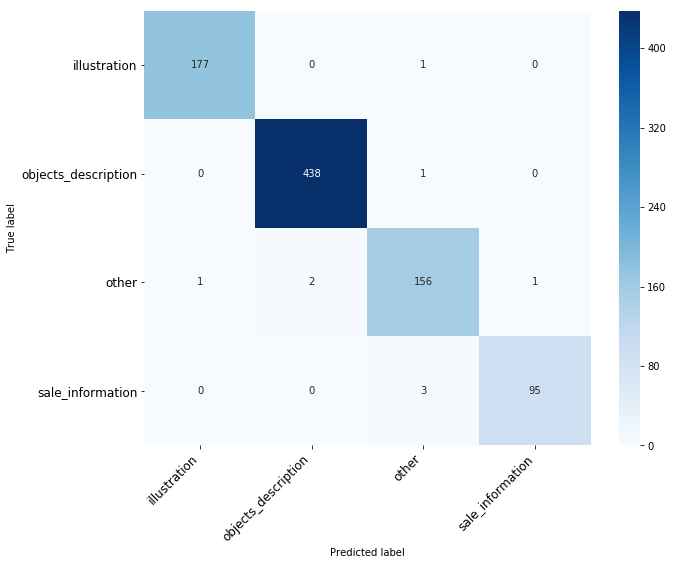

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = [[177,   0,   1,   0],
       [  0, 438,   1,   0],
       [  1,   2, 156,   1],
       [  0,   0,   3,  95]]
labels = ['illustration', 'objects_description', 'other', 'sale_information']

df_cm = pd.DataFrame(confusion_matrix, index=labels, columns=labels, )
fig = plt.figure(figsize=(10,8))
try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
except ValueError:
    raise ValueError("Confusion matrix values must be integers.")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.ylabel('True label')
plt.xlabel('Predicted label');

Une autre métrique intéressante pour estimer la performance du classifier est de regarder le nombre moyen de page et sa déviation standard de chaque classe par catalogue de vente:

|Classe|Nombre moyen|
|---|---|
|Description d'objets|$16.9 \pm 15.08$|
|Information de vente|$1.02 \pm 0.39$|
|Illustration|$1.22 \pm 4.55$|
|Autre|$3.23 \pm 2.2$|

Sachant qu'il y a en moyenne $22.37 \pm 17.88$ pages par catalogue. Les résultats semblent cohérents par rapport à ce que l'on pourrait attendre.
- Une grande majorité de descriptions d'objets avec une grand déviation standard correspondante à la déviation du nombre de page par catalogues
- une seule information de vente par catalogue avec une très petite déviation standard qui montre que le chiffre reste relativement constant
- environ trois pages "autres" (par exemple couverture, dernière page, dos), mais qui varie avec parfois plus de pages vides
- environ une illustration par catalogue, mais avec une grande déviation standard proportionnelle, ce qui montre que certains catalogues n'auront aucune image et d'autre un très grand nombre

Les statistiques complète sont présentée ici:

|Classe| 	moyenne |	déviation standard |	min 	|25% 	|50% |	75% |	max|
|---|---|---|---|---|---|---|---|
|Description d'objets| 16.90|15.08|0.0|10.0|14.0|19.0|185.0 |
|Information de vente| 1.02|0.39|0.0|1.0|1.0|1.0|6.0 |
|Illustration| 1.22|4.56|0.0|0.0|0.0|0.0|105.0 |
|Autre| 3.23|2.21|0.0|3.0|3.0|4.0|39.0 |


### Classification du dataset

Une fois le modèle entraîné ou un modèle déjà entraîné télécharger, il est possible d'inférer les classes de nouvelles images.

Il faut toutefois connaître et paramétrer certaines informations, qui sont explicitées dans les commentaires plus bas.

Une fois de plus le code n'est pas explicité car il est standard et sans réel choix.

In [147]:
from classification.classify import classify

# Dossier contenant les images à annoter
images_folder = config['images_folder']

# Information sur le modèle
config['classification']['model_checkpoint_path'] = '/path/to/the/model.h5'
config['classification']['IMAGE_SIZE'] = (224, 224) # par défaut
config['classification']['use_page_num'] = True # par défaut
config['classification']['labels_txt_path'] = '/path/to/the/labels.txt' # généré par le code précédant

# Annotations manuelles
classification_csv = config['classification']['classification_csv']

# Csv qui contiendra les prédictions faites par le modèle
predicted_classes_csv = config['classification']['predicted_classes_csv']

classify(config)

## Segmentation des catalogues

Une fois les images classifiées, le but de ce projet était de les segmenter afin de pouvoir extraire automatiquement les informations sur les objets mis en vente dans un catalogue.

Seules les images de la classe “descriptions d’objets” sont segmentées. Le but est de déterminer **deux** typologies, les **sections** qui sont soit les catégories d’objets (e.g. Tableaux) soit les artistes (e.g. Couture) et les **descriptions des objets** qui contiennent un numéro de référence ainsi que d’autres informations sur l’objet.

Le choix de ne prédire que ces deux classes est motivé par les raisons suivantes:
- Plus facile d'entraîner et d'évaluer le réseau avec deux classes
- Les deux classes sont tout en haut de la hiérarchie des informations que l'on voudrait pouvoir extraire, par exemple un autre type d'information comme le numéro de référence d'un objet ou encore ses dimensions sont contenus à l'intérieur de la classe descriptions d'objets, ils pourraient donc être extrait par soit des étapes de segmentation successives ou en utilisant directement l'OCR
- Les deux classes ont des typologies visuelles suffisament différentes pour être distinguée par le réseau. Des tentatives qui utilisaient plus de classes ont été infructueuse, comme par exemple essayer de séparer directement les sections contenant des noms d'auteurs de celles décrivant des catégories d'objets, en effet, elles n'étaient pas visuellement assez différentes.

Au total, 500 images ont été annotées pour pouvoir entraîner les deux types de réseaux utilisés, dhSegment et la Tensorflow Object Detection API (TODA) 


### Préparation des annotations

La première étape de la segmentation est d'annoter un certain nombre d'images manuellement. Le format d'annotation attendu est celui utilisé par [labelme](https://github.com/wkentaro/labelme) qui crée des fichiers json très simple qui contiennent les annotations.

La cellule suivante transforme ces annotations afin d'avoir les données nécessaire pour pouvoir entraîner les deux types de réseaux servant à la segmentation.

La première ligne (```prepare_dataset```) est de séparer les données en training et testing set en utilisant par défaut 20% des données pour le test. Cela va créer deux csv, un pour le training, un pour le testing avec chaque annotation (boîte) sur une seule ligne avec les colonnes suivantes:

| filename | width | height | class | xmin | ymin | xmax | ymax | 
| --- | --- | --- |  --- |  --- |  --- |  --- |  --- |
|nom de base du fichier | largeur de l'image | hauteur de l'image | classe de l'annotation | plus petit x de la boîte| plus grand x de la boîte| plus petit y de la boîte | plus grand y de la boîte|

La deuxième ligne (```create_masks```) crée les masques utilisés par [dhSegment](https://github.com/dhlab-epfl/dhSegment) pour l'entraînement, elle crée également des csv pointant vers ces masques et les images de bases qui devront être ajouté dans la configuration de dhSegment.

La troisième ligne (```create_tf_dataset```) crée deux fichiers au format TFRecord avec le bon format pour être utilisé avec la [Tensorflow Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection) et un fichier pbtxt contenant le mapping nombre vers classe demandé par l'API.

In [150]:
from segmentation import prepare_dataset, create_masks, create_tf_dataset

config['segmentation']['annotation_directory'] = '/path/to/the/annotations'

prepare_dataset.prepare_dataset(config)
create_masks.create_masks(config)
create_tf_dataset.create_tf_dataset(config)

### dhSegment

[dhSegment](https://github.com/dhlab-epfl/dhSegment) est un outil développé par le DHlab à l’EPFL. Il s’agit de réseaux "standards" (VGG16 et Resnet-50, ce dernier étant celui utilisé) transformé pour avoir une forme de U qui encode une image puis la décode en des prédictions par classes. Cette approche utilise des résaux pré-entraînés sur imagenet et à l'avantage d'être très simple d'utilisation. En effet, les annotations qui doivent être fournies peuvent être aussi "simples" que colorier avec un masque les régions d'intérêt que l'on voudrait segmenter.

La prédiction de dhSegment se fait donc au pixel, c'est à dire que par exemple, pour un image de 640x480, le réseau va donner en sortie une "image" qui est en réalité une carte de probabilité de taille égale (640x480). Pour chaque pixel, la probabilité de chaque classe est calculée, ce qui nous donne donc avec 3 classes (background, section et object description) une matrice 640x480x3 avec des valeurs entre 0 et 1.

L'entraînement de ce réseau se déroule de manière externe à ce notebook. Il faut suivre la procédure d'installation de dhSegment, puis créer un fichier de configuration adapté. Un exemple de fichier de configuration est donné, mais la syntaxe en susceptible de changer vu que dhSegment est un projet en cours. Tous les fichiers nécessaires à l'entraînement devraient être créés par l'étape précedente, à savoir:
- Un dossier contenant les PNG des annotations
- Deux fichiers csv contenant les chemins absolus vers les images de base et leur masques correspondants
- Un fichier classes.txt contenant le mapping de couleur vers classes

### Tensorflow Object Detection API (TODA)

La [Tensorflow Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection) est une API développée par Tensorflow pour faciliter l'entraînement de modèles qui sont l'état de l'art dans le domaine de détection d'objets sur une image. L'utilisation principale de ces modèles est la segmentation d'images routière.

Cette API offre de très nombreux réseaux pré-entraînés et préconfiguré sur le dataset [COCO](http://cocodataset.org/) et permet de rapidement tester plusieurs configurations différentes.

Contrairement à dhSegment, cette approche ne prédit pas une carte de probabilité, mais donne directement des boîtes par classe. Le réseau sélectionné est une approche dite "faster-rcnn" avec pour base une réseau "inception resnet v2".

L'entraînement se déroule également de manière externe au notebook. Il faut suivre la procédure d'installation [disponible ici](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md) et créer un fichier de configuration adapté. Un exemple de fichier de configuration est donné dans ce répertoire. Tous les fichiers nécessaires à l'entraînement devraient être créés par l'étape précedente, à savoir:
- Deux fichiers au format TFRecord contenant les annotations et les chemins absolus vers les images
- Un fichier pbtxt contenant le mapping nombre vers classe demandé par l'API.

[Voir ici](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/running_locally.md) pour la procédure d'entraînement. Une fois l'entraînement terminé, il faut exporter le modèle pour pouvoir l'utiliser la procédure est [décrite ici](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/exporting_models.md).

### Optimisation des hyper-paramètres

Pour les deux approches, il est nécessaire de procéder à une étape de post-processing afin d'obtenir les boîtes les plus propres possible. Vu que le post-processing dépend d'hyper-paramètres arbitraire, deux modules d'optimisations ont été écrits.

Le post-processing pour chaque approche est détaillé plus bas.

#### Post-processing dhSegment

Le post processing suit les étapes suivantes:
1. Nettoyage des probabilités avec un seuil pour chaque classe, toute probabilité plus basse se fait assigner au fond (background), deux hyper-paramètres (```bin_thresh_section``` et ```bin_thresh_content```
2. Dilatation des probabilité avec opencv selon un kernel paramétrable (```ksize_w``` et ```ksize_h```)
3. Filtrage des formes plus petites qu'un threshold d'aire (```contour_area_thresh```)
4. Ajout des lignes venant de l'OCR avec un padding (```line_padding```)
6. Découpage des indentations, c.f. plus bas pour l'explication, (paramètres: ```indent_thresh```, ```area_thresh``` et ```crop_padding```)
7. Complétion avec les boîtes de l'OCR
8. Nouveau filtrage en fonction de l'aire
9. Sélection des boîtes en prenant en compte le contenu de l'image

**Explication du découpage des indentations**

Dans certaines images, les boîtes étaient tellement proches les unes des autres que la carte de probabilité montrait deux boîtes distinctes comme collée, ce qui résulte en une seul forme.

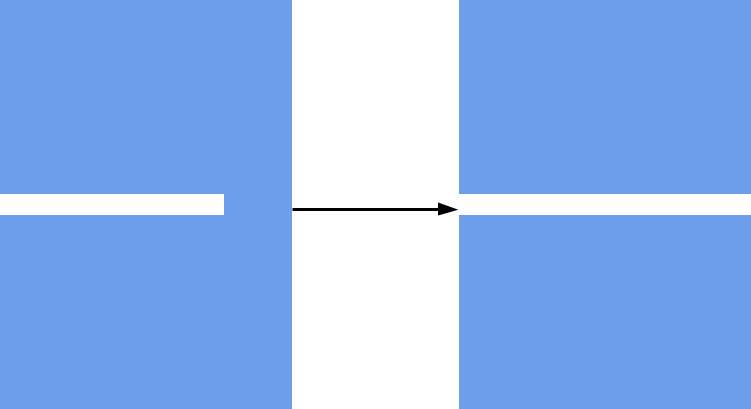

La forme de gauche est clairement composée de deux boîtes distinctes, il faut donc créer une heuristiques pour les séparer. L'idée est donc de cherche les indentations à gauche plus grandes qu'un certain seuil et de couper toute la ligne qui contient l'indentation.

**Optimisation**

Les paramètres sont ensuite optimisés sur 500 itérations à l'aide de [Scikit-optimize](https://scikit-optimize.github.io/). Il faut ensuite les rentrer manuellement dans le code pour la prédiction des boîtes.

In [ ]:
from segmentation.optimize_boxes_dhsegment import optimize_boxes_dhsegment

config['segmentation']['ocr_dir_google'] = '/path/to/google/ocr/jsons'
config['segmentation']['model_dir'] = '/path/to/dhSegment/model'

optimize_boxes_dhsegment(config)

#### Post-processing Tensorflow object detection API
Vu que cette approche fournit directement des boîtes, les étapes de post-processing sont beaucoup plus simples et moins arbitraires.

1. proba_threshold_saleFiltrages des boîtes selon les seuils de probabilités fournis dans les résultats (```proba_threshold_section``` et ```proba_threshold_sale```)
2. Complétion optionelle (paramètrable) des boîtes avec les boîtes des lignes et des lettres de l'OCR (```line_padding_section```,  ```line_padding_sale``` et quatre booléens pour chaque choix de complétion)
3. Supression des boîtes qui sont à l'intérieur des autres

L'optimisation se fait également avec Scikit-Optimize, mais uniquement sur 100 itérations, car il y a moins de paramètres à tester.

In [6]:
from segmentation.optimize_boxes_faster_rcnn import optimize_boxes_faster_rcnn

config['segmentation']['model_dir'] = '/path/to/tensorflow/frozen/model/graph.pb'

optimize_boxes_faster_rcnn(config)

### Performance de la segmentation

De manière visuelle, les résultats sont très similaires pour les deux approches, les boîtes semblement être souvent les mêmes, avec légèrement plus de précision pour l'approche de Tensorflow, mais quelques boîtes de plus pour dhSegment.

En regardant les performances de la [métrique préconisée par COCO](http://cocodataset.org/#detection-eval) (on peut [trouver ici](https://medium.com/@jonathan_hui/map-mean-average-precision-for-object-detection-45c121a31173) une bonne explication de la métrique). On peut voir que les résultats sont en effet très similaires.

|Métrique|dhSegment|TODA|
|---|---|---|
|mAP@ IoU=.50:.05:.95|88.26%|88.45%|
| AP@ IoU=.75|88.41%|89.68%|
|AP@ IoU=.5|92.43%|94.89%|

Malgré la similarité de perfomance, le choix de ne retenir que l'approche de Tensorflow a été fait. En effet, l'approche dhSegment utilise beaucoup plus d'heuristiques arbitraires pour créer des boîtes, comme le découpage des indentations. Ces heuristiques n'ont aucune garantie de fonctionner à grande échelle. L'autre approche créant directement des boîtes, elle a été privilégiée.

### Segmentation du dataset

Une fois le modèle entraîné et ces hyper-paramètres optimisés, il est possible d'inférer la segmentation pour de nouvelles images.

Cette partie du code permet de sélectionner le modèle et de donner son chemin. Il faut également lui donner le chemin vers la prédiction des classes pour les images, la segmentation ne fera que sur les images de descriptions d'objets.

La sortie de cette partie est un fichier numpy contenant les boîtes par image en entrée.

In [13]:
from segmentation.predict_boxes import predict_boxes

config['segmentation']['use_faster_rcnn'] = True or False
config['segmentation']['model_dir'] = '/path/to/the/model/as/previous'
config['classification']['predicted_classes_csv'] = '/path/to/the/predicted/classes.csv'
config['segmentation']['ocr_dir_google'] = '/path/to/google/ocr/jsons'

predict_boxes(config)

## Base de donnée

L'étape suivante est de combiner l'OCR et la segmentation pour obtenir des données structurées qui peuvent être transformées en base de donnée.

### Extraction du contenu des pages

Cette étape combine donc chaque segmentation obtenue précédemment avec l'OCR.

L'idée est de trouver pour chaque boîte qui correspond à un mot de l'OCR la boîte de la segmentation qui lui correspond (ou aucune).

Une fois les boîtes trouvée nous obtenons une liste d'entités étant soit des sections soit des objets avec les coordonées et le texte leur correspondant.

**Numéros de références**

Vu que les numéros de références sont une des portes d'entrées des objets et qu'ils sont très utiles pour quantifier le nombre d'erreur, une correction en post-processing, selon un algorithme relativement simple qui complète automatiquement les numéros, si l'espace le permet, entre deux séquences considérées comme valides. Les séquences sont considérées comme valide si elles sont composées de quatre chiffres croissants plus grand que les séquences précédentes.

**Sections**

Vu l'impossibilité de séparer les deux types de sections qui existe, à savoir les auteurs et les catégories, uniquement avec la segmentation, ces sections ont été triées manuellement dans les deux catégories. Il faut donc fournir un fichier csv contenant les section normalisées (strip, minuscules et sans charactères spéciaux) et leur classes (author, category).

Cette classification, ainsi que la taille en pixel des lettres de certaines sections sont ensuite utilisées pour créer une hiérarchie des sections (Par exemple "Tableau" est en desssus de "Degas"). Cette hiérarchie est ensuite utilisée pour créer la base de donnée. Après observation des données, un choix arbitraire a été pris de s'arrêter à une profondeur de deux dans la hiérarchie, on a donc ainsi des catégories qui peuvent contenir soit des catégories ou des auteurs, mais pas de sous niveau.

**Fichiers de sortie**

Cette étape créee deux fichiers binaires python.

Un fichier contenant une dataframe pandas avec le contenu des pages. Cette dataframe peut être réutilisée afin de compléter le fichiers csv des sections.

Un autre fichiers contenant un arbre de la hiérachie des sections sous la forme du module anytree.

In [37]:
from database.extract_page_content import extract_page_content

config['database']['ocr_dir'] = '/path/to/google/ocr/jsons'
config['database']['section_classified_csv_path'] = '/path/to/section_classified.csv'

extract_page_content(config)

### Prépartion des données pour sql

Cette étape prend les données extraites dans l'étape précédente et génére des fichiers csv pour chaque table de la base de donnée finale.

Cette étape prend également en entrée une liste des divers acteurs extraits des métadonnées. Il est possible de compléter le fichier excels s'il y a de nouveaux acteurs.

Une description plus précise de la base de donnée est disponible ici.

In [45]:
from database.prepare_data_for_sql import prepare_data_for_sql

config['database']['actor_excel_path'] = '/path/to/actor.xslx'

prepare_data_for_sql(config)

### Importation des données dans une base mysql

Une fois les csv de chaque table créés, le plus simple est de les importer via python. En effet, vu que certains des textes sont multilignes et que le csv n'est pas un format très bien défini, il est parfois dificile de directement l'importer via mysql.

Ce code prend les informations de connection à la base mysql et importe les différents fichiers csv de la base de donnée dedans.

In [ ]:
from database.import_into_mysql import import_into_mysql

config['database']['mysql_host'] = 'localhost'
config['database']['mysql_schema'] = 'aucase'
config['database']['mysql_user'] = 'user'
config['database']['mysql_pass'] = 'password'

import_into_mysql(config)